In [9]:
import scanpy as sc
import numpy as np

# Read Random Tabula UCE

In [10]:
random_uce = sc.read("export_data/randomized_tabula_uce_adata.h5ad")
random_uce

AnnData object with n_obs × n_vars = 10000 × 19567
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'sample', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'n_genes'
    var: 'ensembl_id', 'gene_symbol', 'genome', 'mt', 'ercc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'n_cells'
    uns: 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_uce', 'X_umap'
    varm: 'PCs'
    layers: 'X_original'
    obsp: 'connecti

In [11]:
tabula_ad = sc.read("export_data/uce_tabula_33_8_umap.h5ad")

tabula_ad

AnnData object with n_obs × n_vars = 1194952 × 1280
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'sample', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'n_genes'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
real_subsample = tabula_ad[random_uce.obs_names]
real_subsample.obsm["X_uce"] = real_subsample.X
real_subsample

/tmp/user/21290/ipykernel_853944/3858898906.py:2: ImplicitModificationWarning: Setting element `.obsm['X_uce']` of view, initializing view as actual.
  real_subsample.obsm["X_uce"] = real_subsample.X


AnnData object with n_obs × n_vars = 10000 × 1280
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'sample', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'n_genes'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_uce'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [13]:
sc.pp.neighbors(random_uce, use_rep="X_uce")
sc.tl.umap(random_uce)

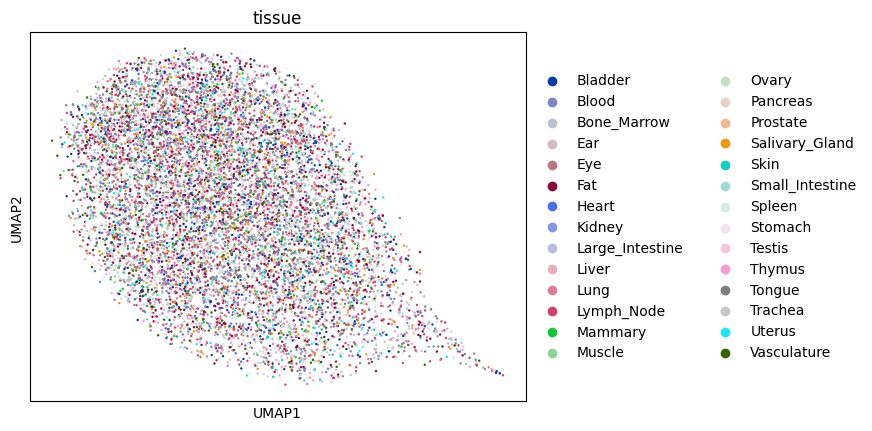

In [14]:
sc.pl.umap(random_uce, color="tissue")

In [15]:
import anndata
joint_ad = anndata.concat({"real":real_subsample, "shuffled":random_uce}, label="Real or shuffled")
joint_ad                        

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 20000 × 0
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'sample', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'n_genes', 'Real or shuffled'
    obsm: 'X_pca', 'X_uce', 'X_umap'

In [16]:
sc.pp.neighbors(joint_ad, use_rep="X_uce")
sc.tl.umap(joint_ad)

In [17]:

import matplotlib.pyplot as plt
sc._settings.settings._vector_friendly=True
import matplotlib

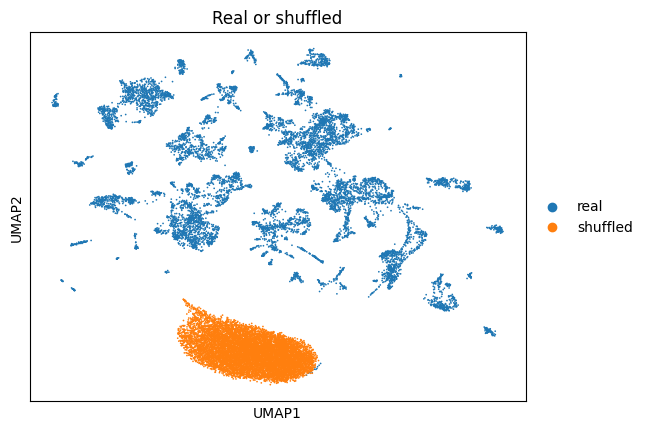

In [18]:
sc.pl.umap(joint_ad, color="Real or shuffled", show=False)
plt.savefig("sfig_fake_cells.svg")

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(real_subsample.obsm["X_uce"])

In [20]:
distances, indices = nbrs.kneighbors(random_uce.obsm["X_uce"])

In [21]:
import pandas as pd

In [22]:
pd.Series(indices.flatten()).value_counts()

9845    8822
7596     801
622      342
6144      35
Name: count, dtype: int64

In [23]:
real_subsample[np.unique(indices.flatten())].obs["cell_ontology_class"]

TSP25_Testis_NA_10X_1_2_GCGAGAAAGTCATGGG                                spermatid
TSP25_Testis_NA_10X_1_2_GCCATTCTCTAGCCTC                                spermatid
TSP10_Fat_MAT_SS2_B134171_B115063_Immune_H15                   smooth muscle cell
TSP20_Stomach_Mucosa_SS2_D101998_B105391_ImmuneHLADRPos_P21           plasma cell
Name: cell_ontology_class, dtype: category
Categories (3, str): ['plasma cell', 'smooth muscle cell', 'spermatid']